
# TP 2: gradient and Newton's method

In this TP we study the convergence of the sequences generated by the gradient and Newton's method on the two test functions: Rosenbrock and Rastrigin

In [44]:
import numpy as np
from numpy import *
import scipy.linalg
from scipy.sparse import spdiags
from scipy.sparse import identity
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.sparse import diags 
 


We remind the functions defined in TP1

In [45]:
def ndim_rosenbrock(x, a=1,b=100):
    """Compute the Rosenbrock function"""
    n=len(x)
    s=0
    for i in range(n-1):
        s=s+b*(x[i+1]-x[i]**2)**2+(a-x[i])**2
    return s


def ndim_grad_rosenbrock(x, a=1,b=100):
    """Computation  of the analytical form of the
    gradient of the Rosenbrock function"""
    n=len(x)
    g = np.zeros(n)
    g[0]= 2*(x[0]-a) -4*b*x[0]*(x[1]-x[0]**2)
    for i in range(1,n-1):
        g[i]= 2*b*(x[i]-x[i-1]**2)+2*(x[i]-a) -4*b*x[i]*(x[i+1]-x[i]**2)
    g[-1] = 2*b*(x[-1]-x[-2]**2)
    return g

def ndim_hess_rosenbrock(x, a=1,b=100):
    """Computation  of the analytical form of the
    Hessian of the Rosenbrock function"""
    n=len(x)
    h = np.zeros((n,n))
    h[0][0] = -4*b*x[1]+12*b*x[0]**2+2
    h[0][1] = -4*b*x[0]
    for i in range(1,n-1):
        h[i][i]= 2*b-4*b*x[i+1]+12*b*x[i]**2+2
        h[i][i-1]=-4*b*x[i-1]
        h[i][i+1]=-4*b*x[i]
    h[-1][-1] = 2*b
    h[-1][-2] = -4*b*x[-2]
    return h

    
def rastrigin(x, a=10):
  """Compute the Rastrigin function"""
  a=10
  n=2
  f=a*n+x[0]**2-a*np.cos(2*np.pi*x[0])+x[1]**2-a*np.cos(2*np.pi*x[1])
  return f

def grad_rastrigin(x, a=10):
  """Computation of the analytical form of the gradient of the Rastrigin function"""
  g = np.zeros(2)
  g[0] = 2*x[0] +a*2*np.pi*np.sin(2*np.pi*x[0])
  g[1] = 2*x[0] +a*2*np.pi*np.sin(2*np.pi*x[1])
  return g

def hess_rastrigin(x, a=10):
  """Computation of the analytical form of the Hessian of the Rastrigin function"""
  h = np.zeros((2,2))
  h[0][0] = 2+a*4*np.pi**2*np.cos(2*np.pi*x[0])
  h[1][1] = 2+a*4*np.pi**2*np.cos(2*np.pi*x[1])
  return h




# Gradient method

Code the gradient method

In [53]:
def steepest_descent(x,obj,grad,tol,maxit,xT,gamma=10**-4):
  # x: starting point
  # obj: the function
  # grad: the gradient 
  # tol: tolerance for the stopping criterion on the norm of the gradient
  # maxit: maximum number of iterations
  # xT: the minimum
    k=0
    g=grad(x)
    if linalg.norm(xT)==0:
      err=[linalg.norm(xT-x)]
    else:
      err=[linalg.norm(xT-x)/linalg.norm(xT)]

    fval=[obj(x)]
    gval=[np.linalg.norm(g)]
    ratio=[]
    xseq=[x]
    while k<maxit:
        k=k+1
        xold=x
        # Gradient step
        step = gamma * g
        xseq.append(x - step)
        
        x -= step

        # Update of the output lists
        fval.append(obj(x))

        if linalg.norm(xT) == 0:
            err.append(linalg.norm(xT - x))
        else:
            err.append(linalg.norm(xT - x) / linalg.norm(xT))

        if k > 1:
            ratio.append(err[-1] / err[-2])

        # Compute new gradient 
        g = grad(x)

        gval.append(np.linalg.norm(g))
        
        # Check convergence
        if np.linalg.norm(g)<tol :
            print('Number of iterations for gradient method : ' + str(k))
            return x,fval,err,gval,ratio,xseq
    print('Maximum number of iterations reached for gradient method ')
    print('Gradient norm :'  + str(np.linalg.norm(g)))
    return x,fval,err,gval,ratio,xseq




# Newton's method

Code the Newton's method





In [67]:
def newton(x0,obj,grad,hess,tol,maxit,xT, gamma=1):
  # x: starting point
  # obj: the function
  # grad: the gradient 
  # tol: tolerance for the stopping criterion on the norm of the gradient
  # maxit: maximum number of iterations
  # xT: the minimum
    x = x0
    k=0
    g=grad(x)
    H=hess(x)
    fval=[obj(x)]
    xseq=[x]
    if linalg.norm(xT)==0:
      err=[linalg.norm(xT-x)]
    else:
      err=[linalg.norm(xT-x)/linalg.norm(xT)]
    gval=[np.linalg.norm(g)]
    ratio=[]

    while k<maxit:
        k=k+1
        
        xold=x

        #Newton step
        step = gamma * np.linalg.solve(H, -g)
        xseq.append(x + step)
        
        x += step

        #Update of the output lists
        
        fval.append(obj(x))
        gval.append(np.linalg.norm(g))

        if linalg.norm(xT) == 0:
            err.append(linalg.norm(xT - x))
        else:
            err.append(linalg.norm(xT - x) / linalg.norm(xT))

        if k > 1:
            ratio.append(err[-1] / err[-2])


        # Update of gradient and Hessian
        
        g = grad(x)
        H = hess(x)

        # Check convergence
        if np.linalg.norm(g)<tol :
            print('Number of iterations for Newton method : '+ str(k) )
            print('Gradient norm :'  + str(np.linalg.norm(g)))
            return x,fval,err,gval,ratio,xseq
    print('Maximum number of iterations reached for Newton method ')  
    print('Gradient norm :'  + str(np.linalg.norm(g)))  
    return x,fval,err,gval,ratio,xseq

                  



# Rosenbrock function 

Use the gradient and Newton's method to minimize the Rosenbrock function. 
Plot the norm of the relative error on the computed solution, the function value and the norm of the gradient, vs the number of iterations. First try the initial point x0 = [1.2, 1.2] and then the more difficult point x0 = [−1.2, 1].


a) For $n=2$, how many iterations does Newton’s method require if $\alpha_k = 1$? And if $\alpha_k = 0.5$? Can you explain this?

b) For $n=2$, does the gradient method converge? Can you fix this?

c) Can you plot an evidence of the quadartic convergence of Newton's method and of the linear convergence of the gradient method?



Maximum number of iterations reached for gradient method 
Gradient norm :0.033261922480517354
Number of iterations for Newton method : 4
Gradient norm :7.471307360336583e-13


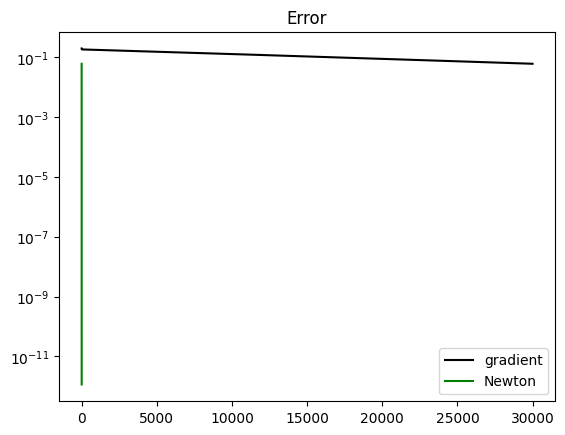

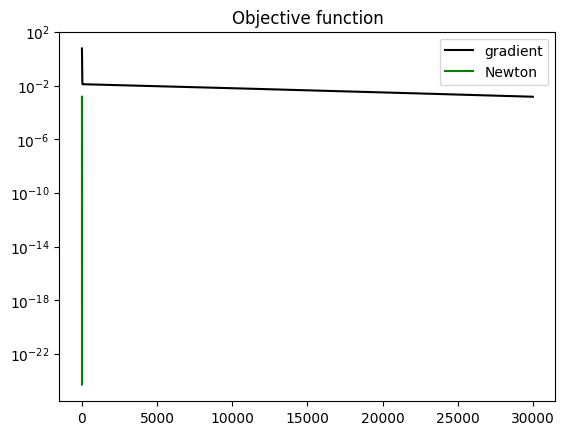

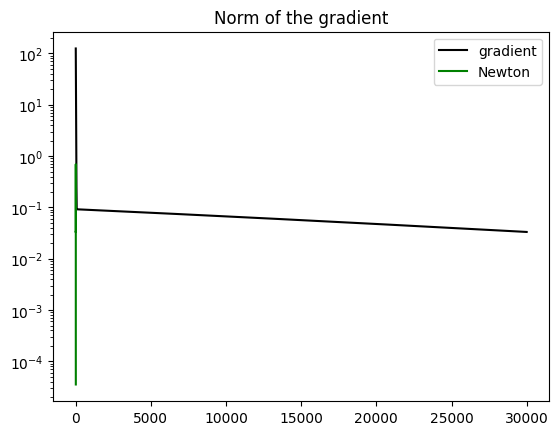

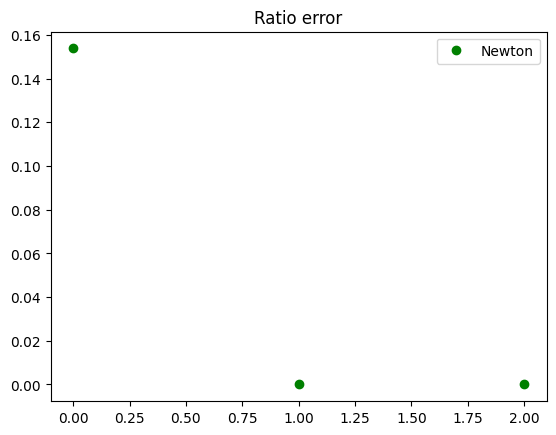

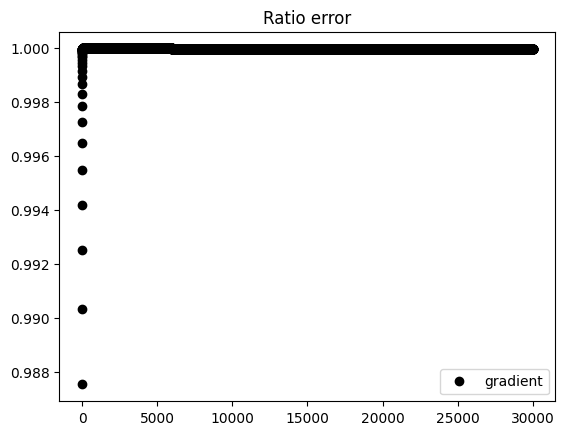

In [54]:
tol=1.e-6
maxit=30000
# x0=np.array([-1.2,1])
x0=np.array([1.2,1.2])
xT=np.array([1.,1.])

obj = ndim_rosenbrock
grad = ndim_grad_rosenbrock
hess = ndim_hess_rosenbrock

_,fvalg,errg,gvalg,ratiog,xseqg = steepest_descent(x0,obj,grad,tol,maxit,xT)
_,fvaln,errn,gvaln,ration,xseqn = newton(x0,obj,grad,hess,tol,maxit,xT)


# Figures
fig1,ax1 = plt.subplots()
ax1.semilogy(errg,'k',label='gradient')
ax1.semilogy(errn,'g',label='Newton')
ax1.set_title('Error')
legend = ax1.legend()

fig2,ax2 = plt.subplots()
ax2.semilogy(fvalg,'k',label='gradient')
ax2.semilogy(fvaln,'g',label='Newton')
ax2.set_title('Objective function')
legend = ax2.legend()

fig3,ax3 = plt.subplots()
ax3.semilogy(gvalg,'k',label='gradient')
ax3.semilogy(gvaln,'g',label='Newton')
ax3.set_title('Norm of the gradient')
legend = ax3.legend()

fig4,ax4 = plt.subplots()
ax4.plot(ration,'og',label='Newton')
ax4.set_title('Ratio error')
legend = ax4.legend()

fig5,ax5 = plt.subplots()
ax5.plot(ratiog,'ok',label='gradient')
ax5.set_title('Ratio error')
legend = ax5.legend()






Observe the plot of the sequence of the generated solution approximations on the contour plots of the function: the methods are able to quicly reach the valley, but then (especially the gradient method) they struggle to reach the minimum

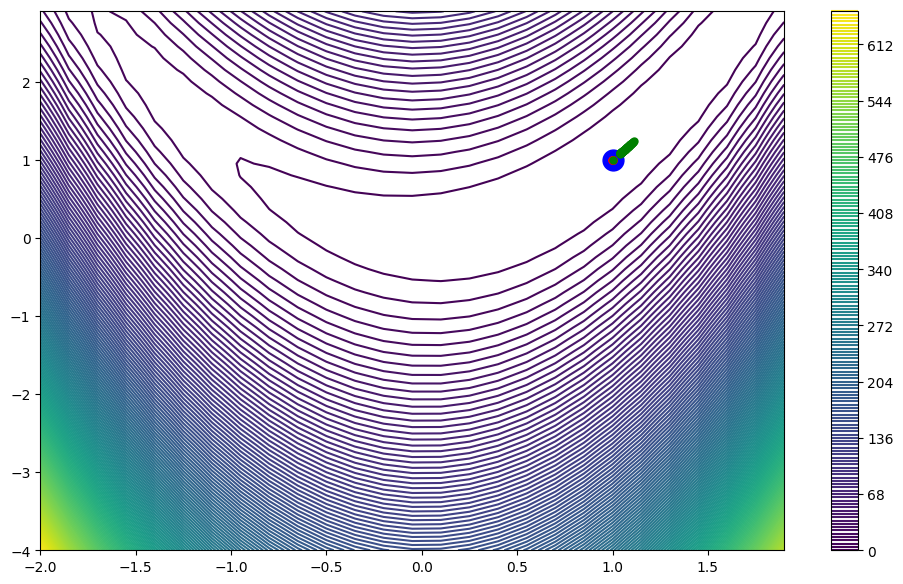

In [55]:
def plot_rosenbrock(x,y, a=1,b=10):
  """Compute the Rosenbrock function"""
  return (x-a)**2 + b*(y-x**2)**2
  
X = np.arange(-2, 2, 0.15)
Y = np.arange(-4, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = plot_rosenbrock(X,Y)

plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([xT[0]],[xT[1]],marker='*',markersize=15, color ='b')
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='b')

for i in range(len(xseqn)):
  xx=xseqn[i]
  plt.plot([xx[0]],[xx[1]],marker='o',markersize=5, color ='r')
for i in range(0,len(xseqg),500):
  xx=xseqg[i]
  plt.plot([xx[0]],[xx[1]],marker='o',markersize=5, color ='g')
plt.colorbar()

Generalize now to the $n$-dimensional case, $n > 2$. 

c) Compare the computational time needed for one iteration for the two methods when $n$ is large (take $n > 1000$)

d) For Newton’s method, compare the computational time for x=x-linalg.solve(H,g) and x=x- np.matmul(np.linalg.inv(H),g) (take $n > 1000$)

e) Add a safeguard in Newton's code in case H is not positive definite. Is this feasible when $n$ is large?



Number of iterations for Newton method : 9
Gradient norm :0.00018559433099861003
Maximum number of iterations reached for gradient method 
Gradient norm :54.57921356566782


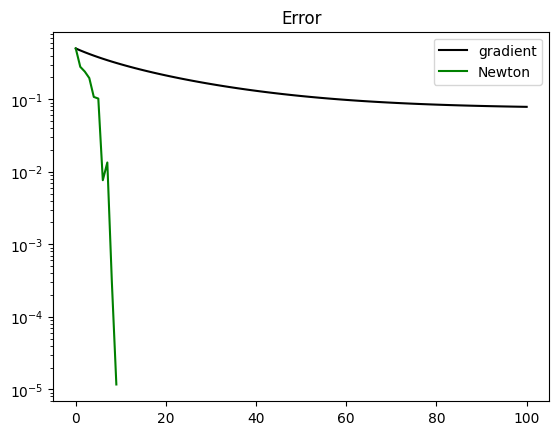

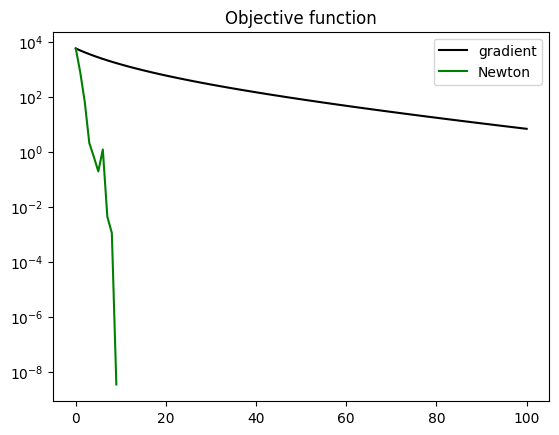

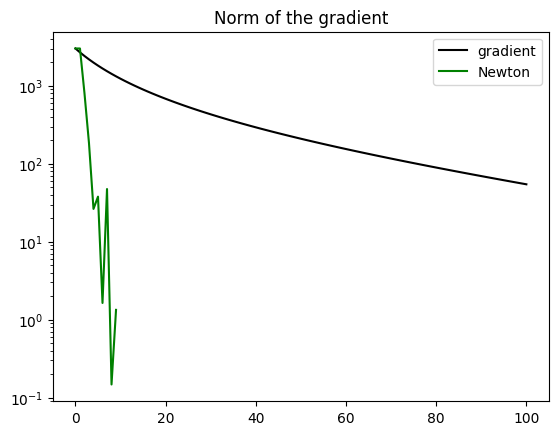

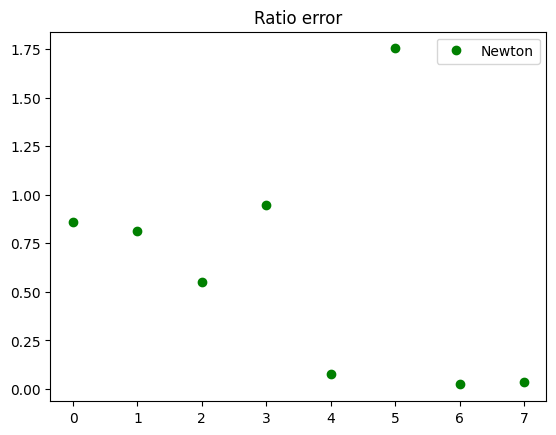

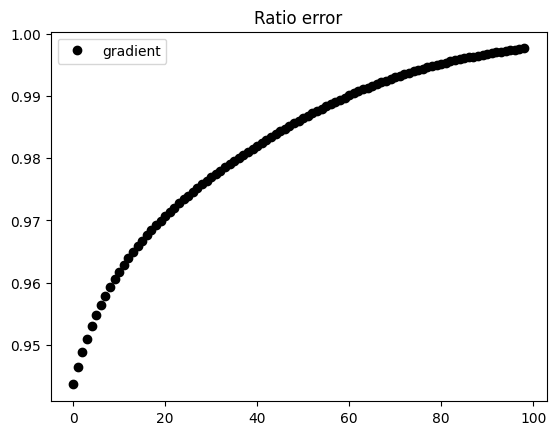

In [68]:
n=100
x0=1.5*np.ones((n))
maxit=100
tol=1.e-1
xT=np.ones((n))

soln,fvaln,errn,gvaln,ration,xseqn=newton(x0,ndim_rosenbrock,ndim_grad_rosenbrock,ndim_hess_rosenbrock,tol,maxit,xT)  
x0=1.5*np.ones((n))
solg,fvalg,errg,gvalg,ratiog,xseqg=steepest_descent(x0,ndim_rosenbrock,ndim_grad_rosenbrock,tol,maxit,xT)

fig1,ax1 = plt.subplots()
ax1.semilogy(errg,'k',label='gradient')
ax1.semilogy(errn,'g',label='Newton')
ax1.set_title('Error')
legend = ax1.legend()

fig2,ax2 = plt.subplots()
ax2.semilogy(fvalg,'k',label='gradient')
ax2.semilogy(fvaln,'g',label='Newton')
ax2.set_title('Objective function')
legend = ax2.legend()

fig3,ax3 = plt.subplots()
ax3.semilogy(gvalg,'k',label='gradient')
ax3.semilogy(gvaln,'g',label='Newton')
ax3.set_title('Norm of the gradient')
legend = ax3.legend()

fig4,ax4 = plt.subplots()
ax4.plot(ration,'og',label='Newton')
ax4.set_title('Ratio error')
legend = ax4.legend()

fig5,ax5 = plt.subplots()
ax5.plot(ratiog,'ok',label='gradient')
ax5.set_title('Ratio error')
legend = ax5.legend()



In [61]:
n=5000
#n=1000
x0=1.2*np.ones((n))
maxit=1
tol=1.e-1
xT=np.ones((n))
import time

t = time.process_time()
solg,fvalg,errg,gvalg,ratiog,xseqg=steepest_descent(x0,ndim_rosenbrock,ndim_grad_rosenbrock,tol,maxit,xT)
timeg = time.process_time() - t
print('Time G :' + str((timeg)))
t = time.process_time()
soln,fvaln,errn,gvaln,ration,xseqn=newton(x0,ndim_rosenbrock,ndim_grad_rosenbrock,ndim_hess_rosenbrock,tol,maxit,xT)  
timen = time.process_time() - t
print('Time N :' + str((timen)))

Maximum number of iterations reached for gradient method 
Gradient norm :4548.98646613261
Time G :0.01793100000000436
Maximum number of iterations reached for Newton method 
Gradient norm :993.284779052903
Time N :8.840731999999988


# Rastrigin function

Start at x0=[1.2,1.2]. Does the Newton method found a minimum? What happens? Why? (compare the plot of the error and the plot of the norm of the gradient) Try to change the strating point and comment on the results (observe the trajectories on the level curves)

Number of iterations for Newton method : 6
Gradient norm :8.285705791275366e-09
Maximum number of iterations reached for gradient method 
Gradient norm :1.7755616838055823
[1.5556349186104046, 1.540402264604931, 1.5274623697367151, 1.5163907855139176, 1.5068602214935318, 1.4986138263707478, 1.4914469628971745, 1.4851944497409415, 1.479721426818036, 1.4749166842764123, 1.4706877044857594, 1.4669569189644613, 1.4636588423945618, 1.4607378499962296, 1.4581464336771448, 1.4558438191913208, 1.4537948588074017, 1.4519691365810312, 1.4503402393810254, 1.4488851583813063, 1.447583794160389, 1.4464185447666744, 1.4453739607406557, 1.4444364545718567, 1.4435940547166415, 1.4428361963318987, 1.4421535424465077, 1.4415378305119473, 1.4409817402292806, 1.4404787793042555, 1.4400231843817088, 1.439609834889733, 1.4392341779095934, 1.4388921624992885, 1.4385801821524289, 1.438295024281736, 1.438033825787163, 1.4377940339097792, 1.4375733716897559, 1.4373698074446088, 1.437181527765865, 1.437006913601

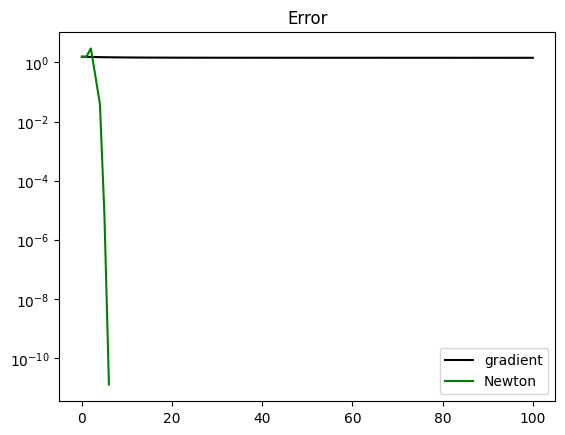

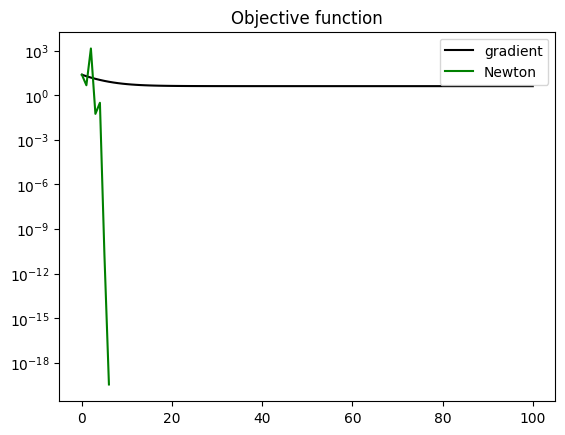

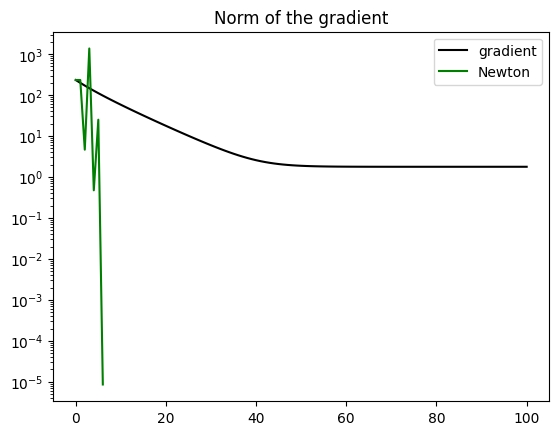

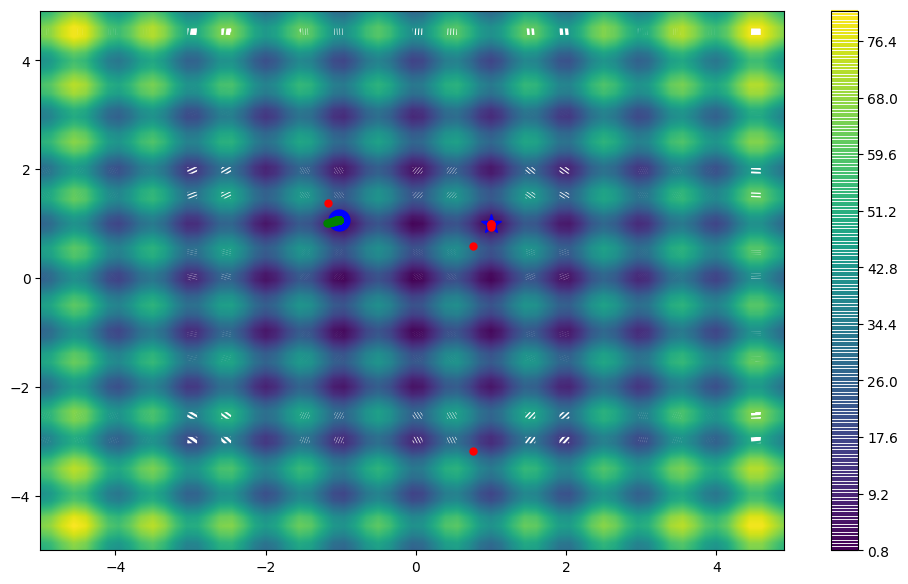

In [70]:
tol=1.e-6
maxit=100
x0=np.array([-1.2,1])
# x0=np.array([1.2,1.2])
xT=np.array([1.,1.])


soln,fvaln,errn,gvaln,ration,xseqn=newton(x0,ndim_rosenbrock,ndim_grad_rosenbrock,ndim_hess_rosenbrock,tol,maxit,xT)  
x0=np.array([-1.2,1])
solg,fvalg,errg,gvalg,ratiog,xseqg=steepest_descent(x0,ndim_rosenbrock,ndim_grad_rosenbrock,tol,maxit,xT)

# Figures
fig1,ax1 = plt.subplots()
print(errg)
ax1.semilogy(errg,'k',label='gradient')
ax1.semilogy(errn,'g',label='Newton')
ax1.set_title('Error')
legend = ax1.legend()

fig2,ax2 = plt.subplots()
ax2.semilogy(fvalg,'k',label='gradient')
ax2.semilogy(fvaln,'g',label='Newton')
ax2.set_title('Objective function')
legend = ax2.legend()

fig3,ax3 = plt.subplots()
ax3.semilogy(gvalg,'k',label='gradient')
ax3.semilogy(gvaln,'g',label='Newton')
ax3.set_title('Norm of the gradient')
legend = ax3.legend()



def plot_rastrigin(x,y):
  a=10
  n=2
  f=a*n+x**2-a*np.cos(2*np.pi*x)+y**2-a*np.cos(2*np.pi*y)
  return f

print(plot_rastrigin(-3,6))
X = np.arange(-5, 5, 0.15)
Y = np.arange(-5, 5, 0.15)
X, Y = np.meshgrid(X, Y)
Z = plot_rastrigin(X,Y)

plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([xT[0]],[xT[1]],marker='*',markersize=15, color ='b')
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='b')

for i in range(len(xseqn)):
  xx=xseqn[i]
  plt.plot([xx[0]],[xx[1]],marker='o',markersize=5, color ='r')
for i in range(len(xseqg)):
  xx=xseqg[i]
  plt.plot([xx[0]],[xx[1]],marker='o',markersize=5, color ='g')
plt.colorbar()



# Trid function

Optional: Use the Newton's and gradient methods to minimize the Trid function

In how many iterations does the Newton's method converge? Why does this happen? 

In [71]:
#TRID FUNCTION
# https://www.sfu.ca/~ssurjano/trid.html
def trid(x):
  d = len(x)
  sum1 = (x[0]-1)**2
  sum2 = 0

  for i in range(d-1):
  
    xold = x[i]
    sum1 = sum1 + (x[i+1]-1)**2
    sum2 = sum2 + x[i+1]*xold
    
  return  sum1 - sum2

def grad_trid(x):
  d = len(x)
  g = np.zeros((d,))

  g[0]=2*(x[0]-1)-x[1]
  g[-1]=2*(x[-1]-1)-x[d-2]
  for i in range(d-2):
    
    i=i+1
    g[i]=2*(x[i]-1)-x[i-1]-x[i+1]
    
  return  g

def hess_trid(x):
  d = len(x)
  h=diags([-1, 2, -1], [-1, 0, 1], shape=(d, d)).toarray()
  return  h


Maximum number of iterations reached for gradient method 
Gradient norm :5.012411947861106
Number of iterations for Newton method : 1
Gradient norm :8.140289677804162e-15


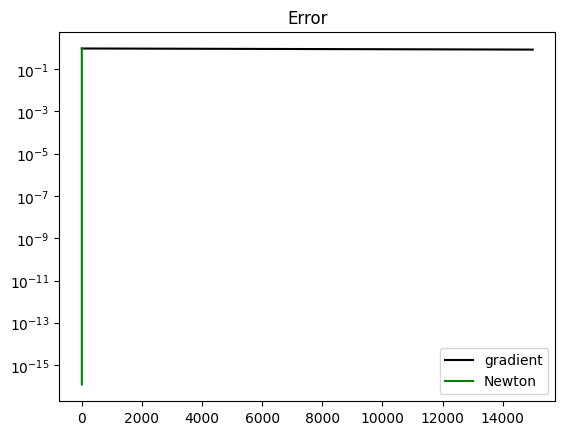

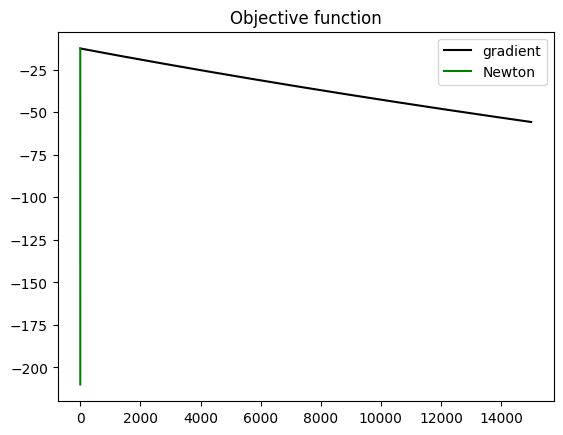

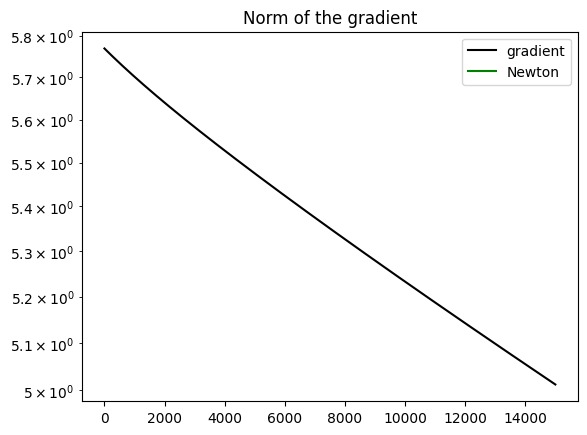

In [73]:
n=10
#n=1000
x0=1.2*np.ones((n))
xT=np.ones((n))
maxit=15000
tol=1.e-1
for i in range(n):
  xT[i]=(i+1)*(n-i)

solg,fvalg,errg,gvalg,ratiog,xseqg=steepest_descent(x0,trid,grad_trid,tol,maxit,xT)
x0=1.2*np.ones((n))
soln,fvaln,errn,gvaln,ration,xseqn=newton(x0,trid,grad_trid,hess_trid,tol,maxit,xT)


fig1,ax1 = plt.subplots()
ax1.semilogy(errg,'k',label='gradient')
ax1.semilogy(errn,'g',label='Newton')
ax1.set_title('Error')
legend = ax1.legend()

fig2,ax2 = plt.subplots()
ax2.plot(fvalg,'k',label='gradient')
ax2.plot(fvaln,'g',label='Newton')
ax2.set_title('Objective function')
legend = ax2.legend()

fig3,ax3 = plt.subplots()
ax3.semilogy(gvalg,'k',label='gradient')
ax3.semilogy(gvaln,'g',label='Newton')
ax3.set_title('Norm of the gradient')
legend = ax3.legend()



